<a href="https://colab.research.google.com/github/sofia-ys/Estructura-de-Datos-y-Programacion/blob/main/Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***DESAFIO 4***

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
from collections import deque
import math
random.seed(12)


**Nivel 1 – Laberinto como matriz (camino = 0, pared = 1) // Level 1 – Maze as a Matrix (path = 0, wall = 1)**


Consigna 1 – Búsqueda en profundidad (DFS) // Task 1 – Depth-First Search (DFS)

In [ ]:
 def consigna_1(maze,start,goal):
    rows, cols = len(maze), len(maze[0])
    visited = set()
    path = []
    directions = [(-1,0), (1,0), (0,-1), (0,1)] # Directions: up, down, left, right

    def dfs(x, y):
        # Base cases
        if (x, y) == goal:
            path.append((x, y))
            return True
        if (x, y) in visited:
            return False

        visited.add((x, y))
        path.append((x, y))

        for dx, dy in directions: #Explore possible moves
            nx, ny = x + dx, y + dy
            # Stay inside the maze and avoid walls
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                if dfs(nx, ny):
                    return True

        path.pop() #Dead end? > undo last move and try again
        return False

    found = dfs(*start)
    return path if found else None


Consigna 2 – Búsqueda en anchura (BFS) // Task 2 – Breadth-First Search (BFS)

In [ ]:
def consigna_2(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    parents = {start: None}
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    frontier = deque([start])

    while frontier:
        x, y = frontier.popleft()

        # Reconstruct path if goal is found
        if (x, y) == goal:
            path = []
            while (x, y) is not None:
                path.append((x, y))
                parent = parents[(x, y)]
                if parent is None:
                    break
                x, y = parent
            return list(reversed(path))

        # Mark visited
        maze[x][y] = 2

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                parents[(nx, ny)] = (x, y)
                frontier.append((nx, ny))
                maze[nx][ny] = 2

    return None


**Nivel 2 – Algoritmos clásicos y heurísticos // Level 2 – Classical and Heuristic Algorithms**

Consigna 3 – Algoritmo de Dijkstra // Task 3 – Dijkstra’s Algorithm


In [ ]:
def consigna_3(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)] # Directions: up, down, left, right

    #Randomly assign terrain difficulty to walkable cells; 0 = easy path, 2 = mud, 3 = rocks, 1 = wall
    for i in range(rows):
        for j in range(cols):
            if maze[i][j] == 0:
                maze[i][j] = random.choices([0, 2, 3], weights=[0.7, 0.2, 0.1])[0] # Randomly choose terrain type

    #Define movement costs for each terrain type
    terrain_costs = {
        0: 1,            # easy path
        2: 3,            # mud
        3: 5,            # rocks
        1: float('inf')  # wall (impassable)
    }

    #Initialize Dijkstra structures
    dist = {(i, j): float('inf') for i in range(rows) for j in range(cols)}
    parent = {start: None}
    visited = set()

    dist[start] = terrain_costs[maze[start[0]][start[1]]]

    #Dijkstra's algorithm
    while True:
        # Pick unvisited node with smallest distance
        min_node = None
        min_dist = float('inf')
        for node, d in dist.items():
            if node not in visited and d < min_dist:
                min_node = node
                min_dist = d

        if min_node is None:
            break  # all reachable nodes visited

        x, y = min_node
        visited.add(min_node)

        if min_node == goal:
            # reconstruct path
            path = []
            while min_node is not None:
                path.append(min_node)
                min_node = parent[min_node]
            path.reverse()
            return path

        # explore neighbors
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols:
                cost = terrain_costs[maze[nx][ny]]
                if cost != float('inf'):  # skip walls
                    new_cost = dist[(x, y)] + cost
                    if new_cost < dist[(nx, ny)]:
                        dist[(nx, ny)] = new_cost
                        parent[(nx, ny)] = (x, y)

    return None


Consigna 4 – Algoritmo A* // Task 4 - Algorithm A*

In [ ]:
def manhattan(a, b): #Heuristic function: Manhattan distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def consigna_4(maze, start, goal, use_heuristic=True):
    rows, cols = len(maze), len(maze[0])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)] # Directions: up, down, left, right

    # Movement costs per terrain (same idea as consigna_3)
    terrain_costs = {
        0: 1,            # easy path
        2: 3,            # mud
        3: 5,            # rocks
        1: float('inf')  # wall
    }

    # Initialize data structures
    g_cost = {(i, j): float('inf') for i in range(rows) for j in range(cols)}  # real cost
    f_cost = {(i, j): float('inf') for i in range(rows) for j in range(cols)}  # estimated total cost (real cost _ algorithm)
    parent = {start: None}
    visited = set()

    g_cost[start] = 0
    f_cost[start] = manhattan(start, goal) if use_heuristic else 0

    while True:
        # Find unvisited node with smallest f_cost
        current = None
        lowest_f = float('inf')
        for node in f_cost:
            if node not in visited and f_cost[node] < lowest_f:
                lowest_f = f_cost[node]
                current = node

        if current is None:  # no reachable node
            break

        x, y = current
        visited.add(current)

        # Stop if goal reached
        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            path.reverse()
            return path

        # Explore all directions
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols:
                cost = terrain_costs.get(maze[nx][ny], 1)
                if cost == float('inf'):  # wall
                    continue
                tentative_g = g_cost[(x, y)] + cost
                # Only update if we found a cheaper path
                if tentative_g < g_cost[(nx, ny)]:
                    g_cost[(nx, ny)] = tentative_g
                    h = manhattan((nx, ny), goal) if use_heuristic else 0
                    f_cost[(nx, ny)] = tentative_g + h
                    parent[(nx, ny)] = (x, y)

    return None


**Nivel 3 – Estrategias no óptimas // Level 3 - Non-optimal Strategies**


Consigna 5 – Algoritmo Wall-Follower // Task 5 - Wall-Follower Algorithm

In [ ]:
def consigna_5(maze, start, goal, right_hand=False):
    rows, cols = len(maze), len(maze[0])
    directions = [(-1, 0), (0, 1), (1, 0), (0, -1)] # Moves: up, right, down, left

    path = [start]
    x, y = start
    direction = 1

    def turn_left(d):
        return (d - 1) % 4
    def turn_right(d):
        return (d + 1) % 4

    def in_bounds(a, b):
        return 0 <= a < rows and 0 <= b < cols

    visited_steps = 0
    max_steps = rows * cols * 4  # safety cap

    while (x, y) != goal and visited_steps < max_steps:
        visited_steps += 1

        # Choose which side to check first (right or left hand rule)
        check_dir = turn_right(direction) if right_hand else turn_left(direction)
        dx, dy = directions[check_dir]
        nx, ny = x + dx, y + dy

        if in_bounds(nx, ny) and maze[nx][ny] == 0: #If side cell is open, turn that way, move forward, add position to path
            direction = check_dir
            x, y = nx, ny
            path.append((x, y))
        else: # If side cell is blocked, try going straight
            dx, dy = directions[direction]
            nx, ny = x + dx, y + dy
            if in_bounds(nx, ny) and maze[nx][ny] == 0:
                x, y = nx, ny
                path.append((x, y))
            else: # Turn toward opposite wall side (keep hand on wall)
                direction = turn_left(direction) if right_hand else turn_right(direction)

    return path


Consigna 6 – Backtracking (vuelta atrás) // Task 6 - Backtracking

In [ ]:
def consigna_6(maze, start, goal):
    rows,cols = len(maze), len(maze[0])
    directions = [(-1,0), (1,0), (0,-1), (0,1)] #Directions: up, right, down, left

    visited = []
    for i in range(rows):
        row_list = []
        for j in range(cols):
            row_list.append(False)
        visited.append(row_list)

    path = []
    def backtrack(x, y):
        # Base case: reached the goal
        if (x, y) == goal:
            path.append((x, y))
            return True

        # Mark the current cell as visited
        visited[x][y] = True
        path.append((x, y))

        # Try all possible moves
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            # Check boundaries and conditions
            if nx >= 0 and nx < rows and ny >= 0 and ny < cols:
                if maze[nx][ny] == 0 and not visited[nx][ny]:
                    if backtrack(nx, ny):   # recursive call
                        return True

        # Dead end → go back
        path.pop()
        return False

    # Start backtracking from the start cell
    found = backtrack(start[0], start[1])

    # Return result
    if found:
        return path
    else:
        return None

**Nivel 4 – Extensiones visuales // Level 4 - Visual extensions**


Consigna 7 – Visualización con matplotlib // Task 7 - Visualization with matplotlib


In [ ]:
def consigna_7(maze, path, start, goal, title="Maze Solver"):
  # Convert maze to numpy array
  maze_array = np.array(maze)
  rows = len(maze_array)
  cols = len(maze_array[0])
  fig, ax = plt.subplots(figsize=(6,6))
  ax.imshow(maze_array, cmap="binary") # black walls, white paths
  # Draw grid
  ax.set_xticks(np.arange(-0.5, cols, 1))
  ax.set_yticks(np.arange(-0.5, rows, 1))
  ax.grid(color='gray', linestyle='-', linewidth=0.5)
  # Path line
  if path:
    xs = [y for x, y in path]
    ys = [x for x, y in path]
    ax.plot(xs, ys, color="cyan", linewidth=3, marker='o', markersize=5)
    # Mark start and end
    ax.text(start[1], start[0], 'S', color='green', fontsize=12, fontweight='bold', ha='center', va='center')
    ax.text(goal[1], goal[0], 'E', color='red', fontsize=12, fontweight='bold', ha='center', va='center')
    # Remove axes
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    # Title
    ax.set_title("Laberinto con camino")
    plt.show()

Consigna 8 – Generador de laberintos aleatorios // Task 8- Random Maze Generator

In [ ]:
def consigna_8(rows, cols, start, goal):
    # Ensure odd dimensions for a symmetrical structure
    if rows % 2 == 0: rows += 1
    if cols % 2 == 0: cols += 1

    # Initialize maze with all walls (1)
    maze = [[1 for _ in range(cols)] for _ in range(rows)]
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    def in_bounds(x, y):
        # Only carve inside (leave 1-cell border of walls)
        return 1 <= x < rows - 1 and 1 <= y < cols - 1

    def count_open_neighbors(x, y):
        #Count how many open neighbors the cell has (avoid over-carving)
        count = 0
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if in_bounds(nx, ny) and maze[nx][ny] == 0:
                count += 1
        return count

    def carve(x, y):
        #Recursibe backtracker
        maze[x][y] = 0
        random.shuffle(directions)
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if in_bounds(nx, ny) and maze[nx][ny] == 1 and count_open_neighbors(nx, ny) <= 1:
                carve(nx, ny)

    #Generate maze inside
    carve(1, 1)

    #Keep the full border solid
    for i in range(rows):
        maze[i][0] = maze[i][cols - 1] = 1
    for j in range(cols):
        maze[0][j] = maze[rows - 1][j] = 1

    #Make sure start and end goal are 0
    maze[start[0]][start[1]] = 0
    maze[goal[0]][goal[1]] = 0

    # Ensure goal is reachable (in case it's isolated)
    if all(maze[goal[0] + dx][goal[1] + dy] == 1
           for dx, dy in directions if in_bounds(goal[0] + dx, goal[1] + dy)):
        maze[goal[0] - 1][goal[1]] = 0

    return maze


##**User menu**

Maze Solver
Enter number of rows: 5
Enter number of columns: 5
Start cell: 0
Goal cell: 0

Generated maze:
[1, 1, 1, 1, 1]
[1, 0, 1, 0, 1]
[1, 0, 0, 0, 1]
[1, 1, 0, 1, 0]
[1, 1, 1, 1, 0]

Choose algorithm:
1. DFS
2. BFS
3. Dijkstra
4. A*
5. Wall-Follower
6. Backtracking
Select an option: 5

 Path found: [(1, 1), (2, 1), (2, 2), (3, 2), (2, 2), (2, 3), (1, 3), (2, 3), (2, 2), (2, 1), (1, 1), (2, 1), (2, 2), (3, 2), (2, 2), (2, 3), (1, 3), (2, 3), (2, 2), (2, 1), (1, 1), (2, 1), (2, 2), (3, 2), (2, 2), (2, 3), (1, 3), (2, 3), (2, 2), (2, 1), (1, 1), (2, 1), (2, 2), (3, 2), (2, 2), (2, 3), (1, 3), (2, 3), (2, 2), (2, 1), (1, 1), (2, 1), (2, 2), (3, 2), (2, 2), (2, 3), (1, 3), (2, 3), (2, 2), (2, 1), (1, 1), (2, 1), (2, 2), (3, 2), (2, 2), (2, 3), (1, 3)]


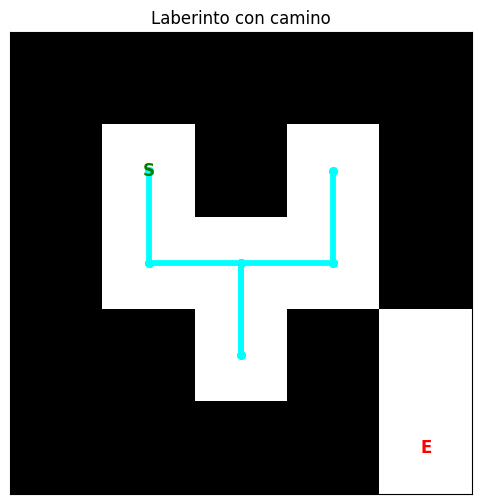

In [ ]:
def main():
    print("Maze Solver")
    rows = int(input("Enter number of rows: "))
    cols = int(input("Enter number of columns: "))

    start = (1,1)
    goal = (rows - 1, cols - 1)
    maze = consigna_8(rows, cols, start, goal)

    print("Start cell:", maze[start[0]][start[1]])
    print("Goal cell:", maze[goal[0]][goal[1]])

    print("\nGenerated maze:")
    for r in maze:
        print(r)

    print("\nChoose algorithm:")
    print("1. DFS")
    print("2. BFS")
    print("3. Dijkstra")
    print("4. A*")
    print("5. Wall-Follower")
    print("6. Backtracking")

    choice = input("Select an option: ")

    # use a copy each time to avoid overlap
    maze_copy = []
    for row in maze:
      new_row = []
      for cell in row:
        new_row.append(cell)
      maze_copy.append(new_row)

    if choice == "1":
        path = consigna_1(maze_copy, start, goal)
        title = "DFS Solver"
    elif choice == "2":
        path = consigna_2(maze_copy, start, goal)
        title = "BFS Solver"
    elif choice == "3":
        path = consigna_3(maze_copy, start, goal)
        title = "Dijkstra Solver"
    elif choice == "4":
        path = consigna_4(maze_copy, start, goal)
        title = "A* Solver"
    elif choice == "5":
        path = consigna_5(maze_copy, start, goal, right_hand=True)
        title = "Wall-Follower"
    elif choice == "6":
        path = consigna_6(maze_copy, start, goal)
        title = "Backtracking Solver"
    else:
        print("Invalid option.")
        return

    if path:
        print("\n Path found:", path)
    else:
        print("\n No path found.")
    consigna_7(maze, path, start, goal, title)


if __name__ == "__main__":
    main()

##**Comparaciones y Consideraciones:**


DFS vs BFS  

Sin duda, el algoritmo BFS será más útil cuando no solo nos interese una posible solución, sino la más corta de todas las soluciones. Es cierto que BFS consume más memoria, pero en una situación ideal en la que los caminos posibles son relativamente cortos en comparación con el número de caminos, este algoritmo resultará más eficiente que DFS.


DFS vs Backtracking

Los dos algoritmos son muy parecidos, con la diferencia que el secundo va a retroceder si se topa con un callejón sin salida, retrocedendo al último punto cpn opciones.
